In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as smi
import pylab
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')


In [4]:
df = pd.read_csv('UniversalBank.csv')
df.head(5)


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
 df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [7]:
df.mean()

ID                     2500.500000
Age                      45.338400
Experience               20.104600
Income                   73.774200
ZIP Code              93152.503000
Family                    2.396400
CCAvg                     1.937938
Education                 1.881000
Mortgage                 56.498800
Personal Loan             0.096000
Securities Account        0.104400
CD Account                0.060400
Online                    0.596800
CreditCard                0.294000
dtype: float64

In [8]:
df.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [9]:
df.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
 df.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
df.shape

(5000, 14)

In [13]:
df = df.drop(['ID','ZIP Code'],axis=1)

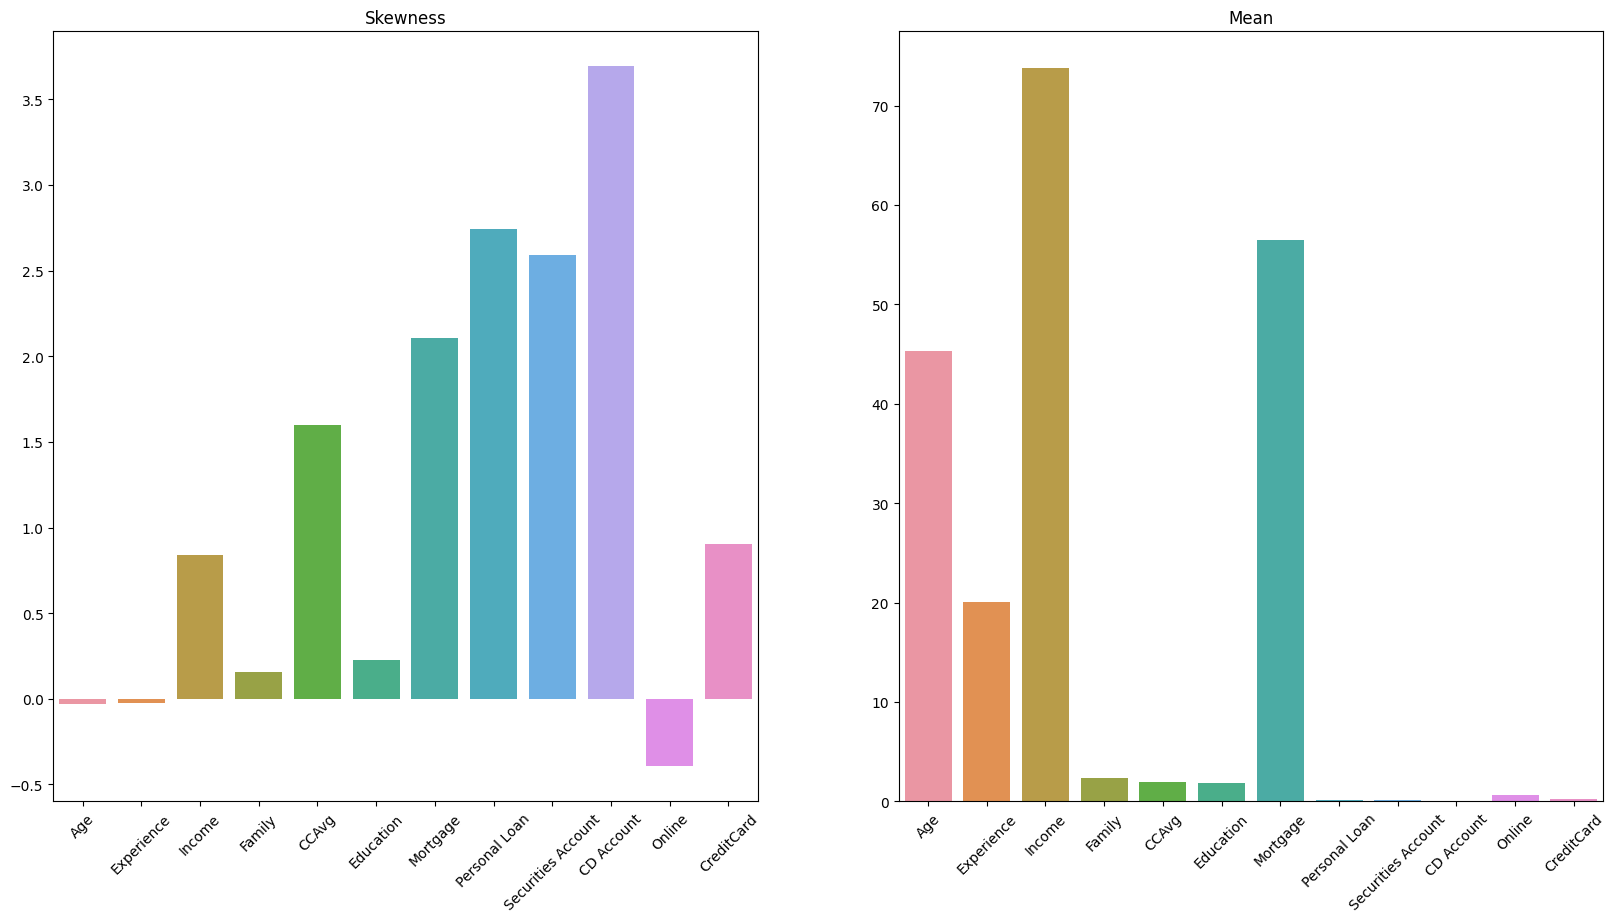

In [14]:
skewness_values = df.skew()
mean_values = df.mean()
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(x=skewness_values.index, y=skewness_values.values, ax=ax[0])
ax[0].set_title('Skewness')
ax[0].tick_params(axis='x', rotation=45)
sns.barplot(x=mean_values.index, y=mean_values.values, ax=ax[1])
ax[1].set_title('Mean')
ax[1].tick_params(axis='x', rotation=45)
plt.show()

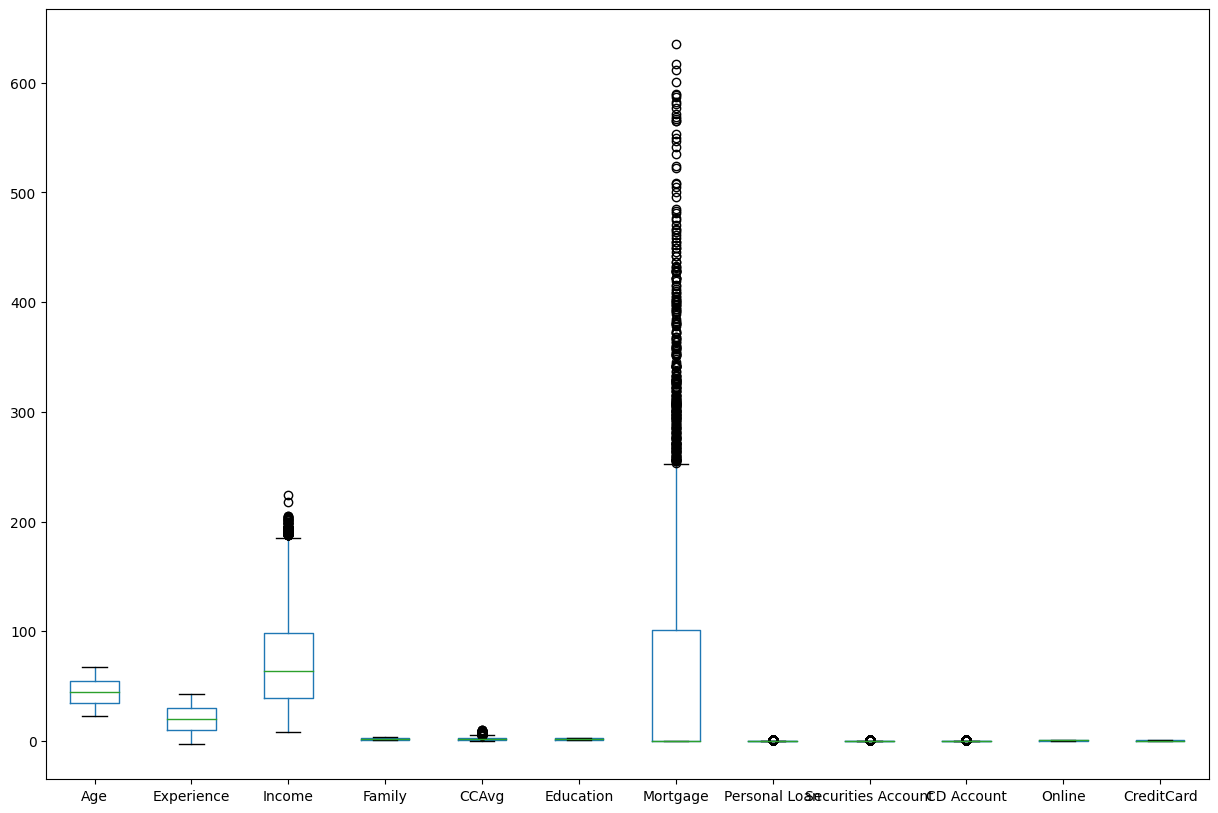

In [15]:
df.boxplot(figsize =(15,10), grid = False)
plt.show()


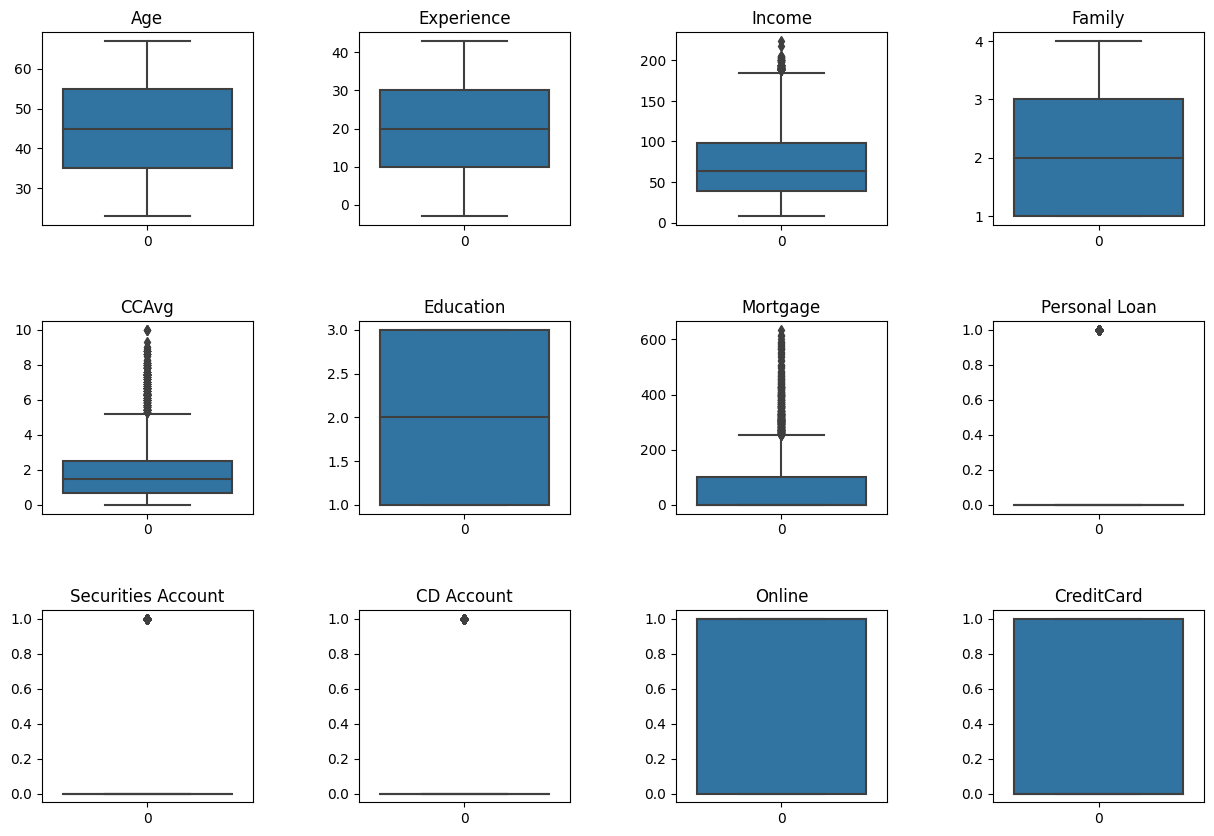

In [18]:

columnas_por_fila = 4
num_columnas = len(df.describe().columns)
num_filas = -(-num_columnas // columnas_por_fila)

fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, columna in enumerate(df.describe().columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    sns.boxplot(df[columna], ax=ax[fila_actual, columna_actual])
    ax[fila_actual, columna_actual].set_title(columna)

plt.show()


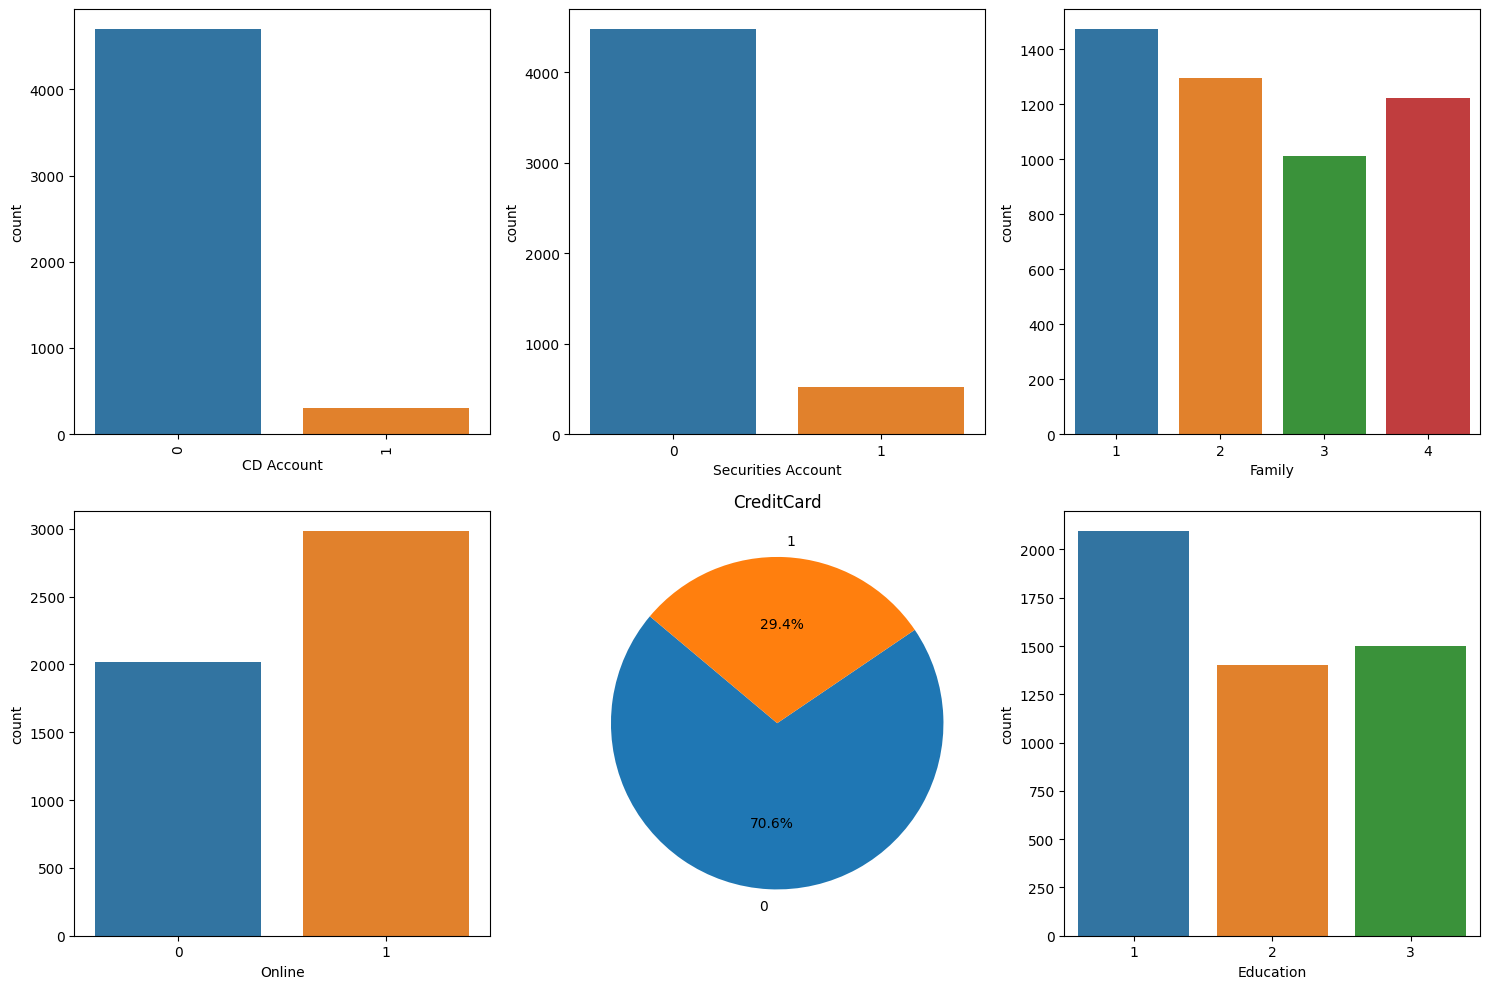

In [25]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(data=df, x='CD Account', ax=ax[0, 0])
sns.countplot(data=df, x='Securities Account', ax=ax[0, 1])
sns.countplot(data=df, x='Family', ax=ax[0, 2])
sns.countplot(data=df, x='Online', ax=ax[1, 0])
sns.countplot(data=df, x='Education', ax=ax[1, 2])

# Fixing the pie chart part
ax[1, 1].pie(df['CreditCard'].value_counts(), labels=df['CreditCard'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1, 1].set_title('CreditCard')

ax[0, 0].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

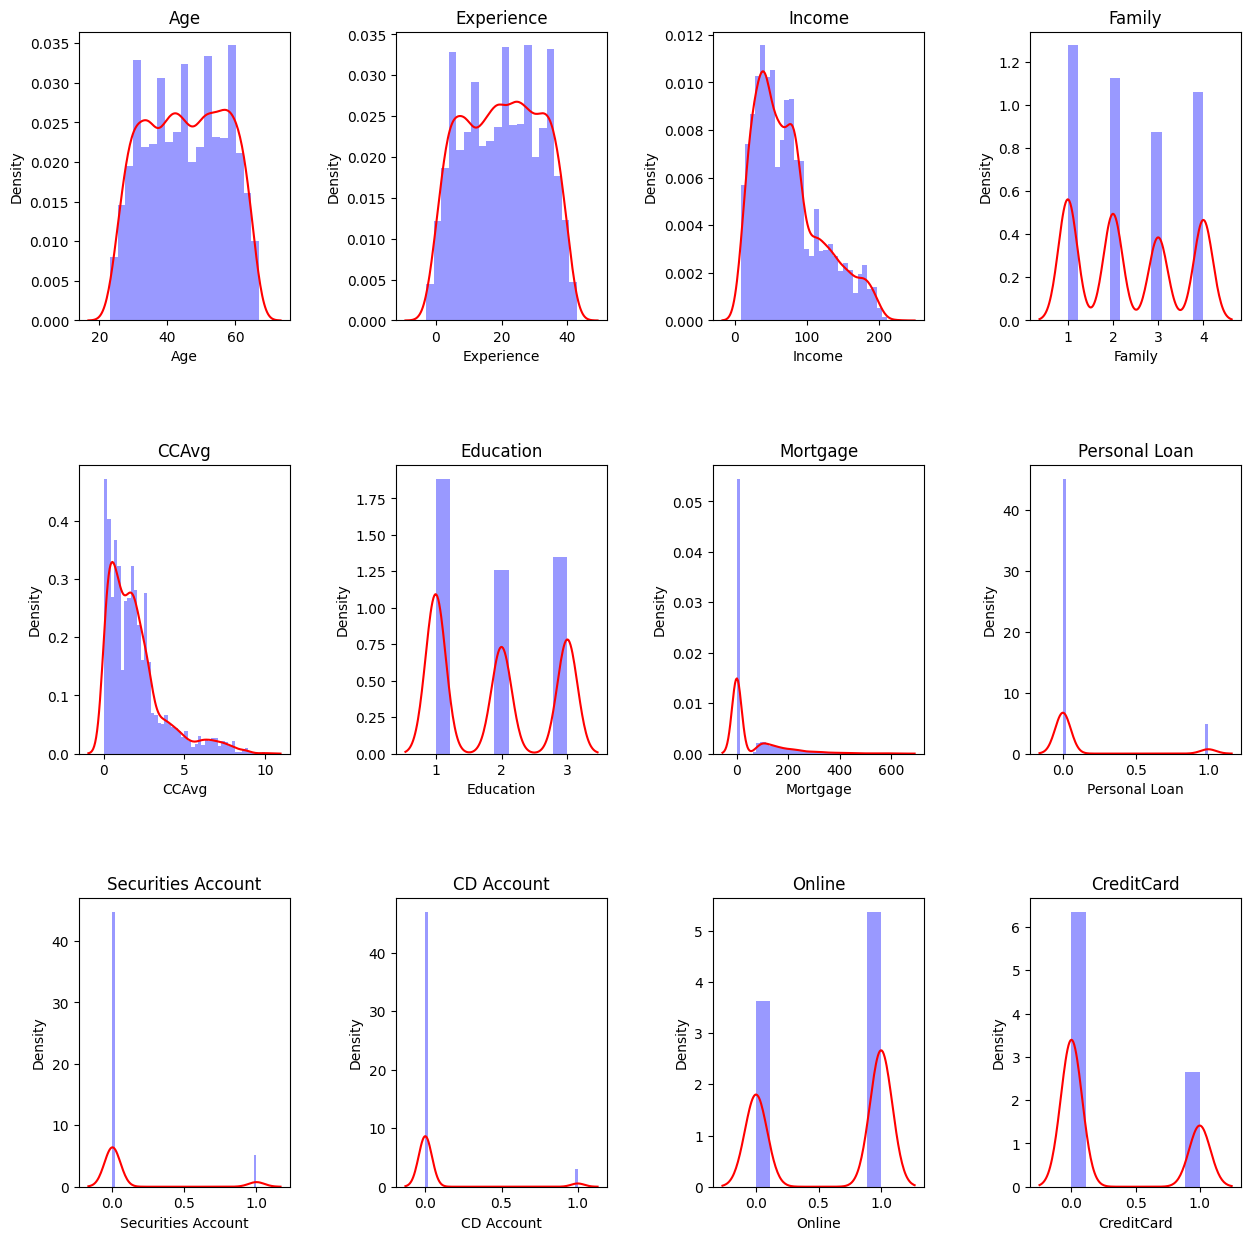

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

columnas_por_fila = 4
num_columnas = len(df.describe().columns)
num_filas = -(-num_columnas // columnas_por_fila)

fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, columna in enumerate(df.describe().columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    sns.distplot(df[columna], ax=ax[fila_actual, columna_actual], color='red', hist_kws={'color': 'blue'})
    ax[fila_actual, columna_actual].set_title(columna)

plt.show()


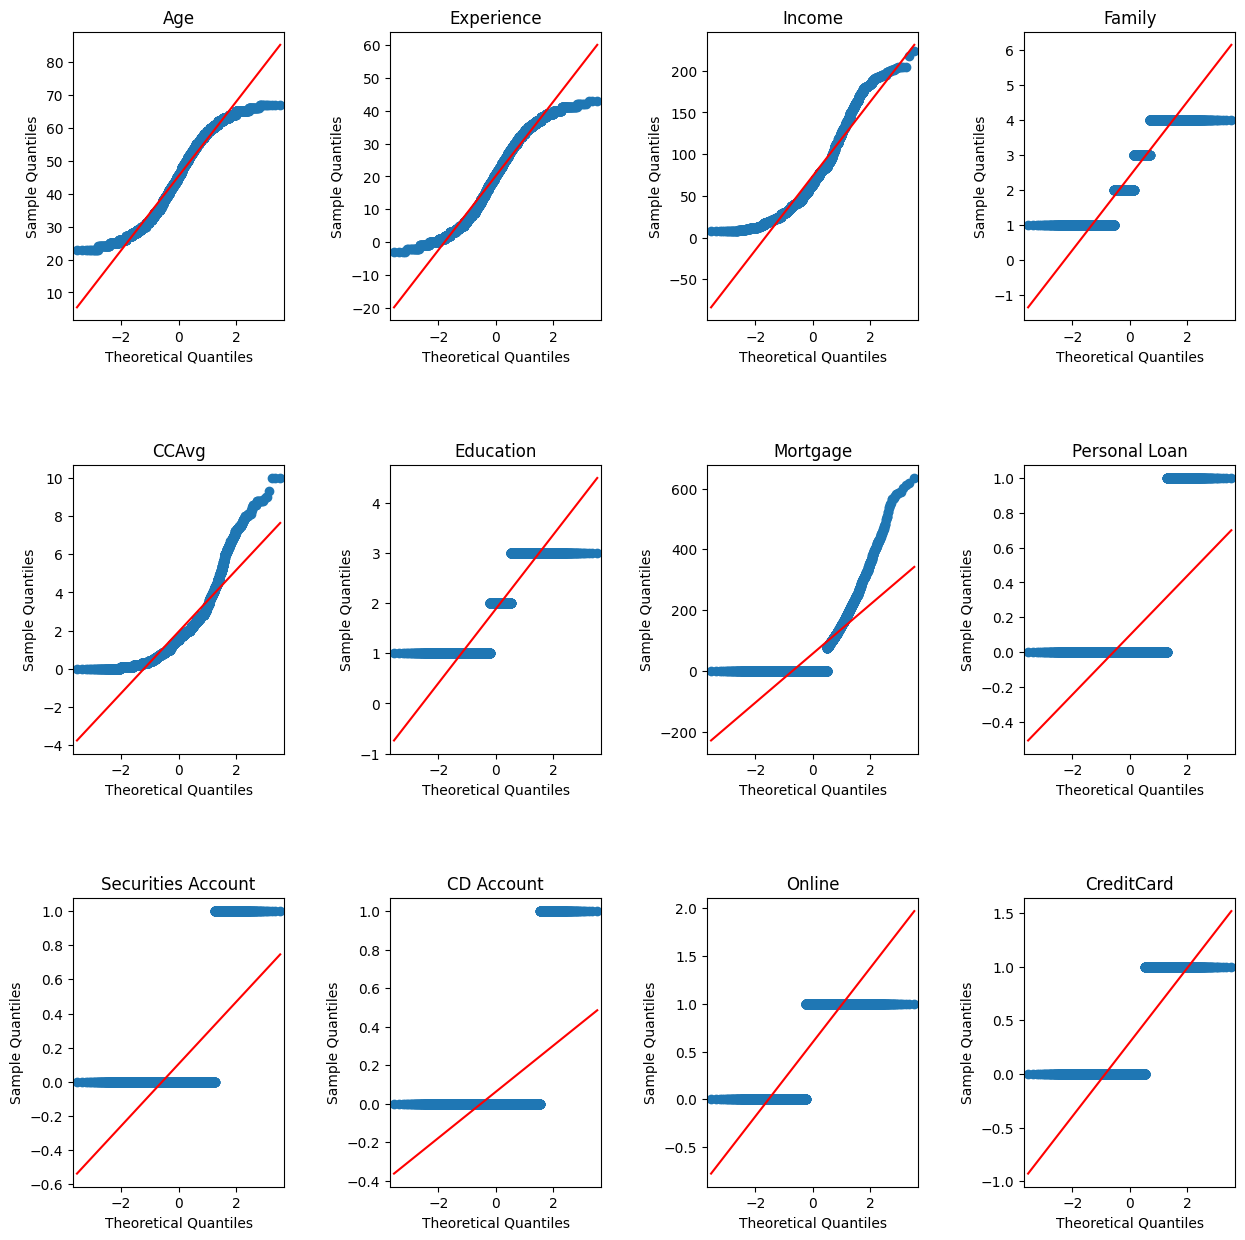

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

columnas_por_fila = 4
num_columnas = len(df.describe().columns)
num_filas = -(-num_columnas // columnas_por_fila)

fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, columna in enumerate(df.describe().columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    sm.qqplot(df[columna], ax=ax[fila_actual, columna_actual], line="r")
    ax[fila_actual, columna_actual].set_title(columna)

plt.show()


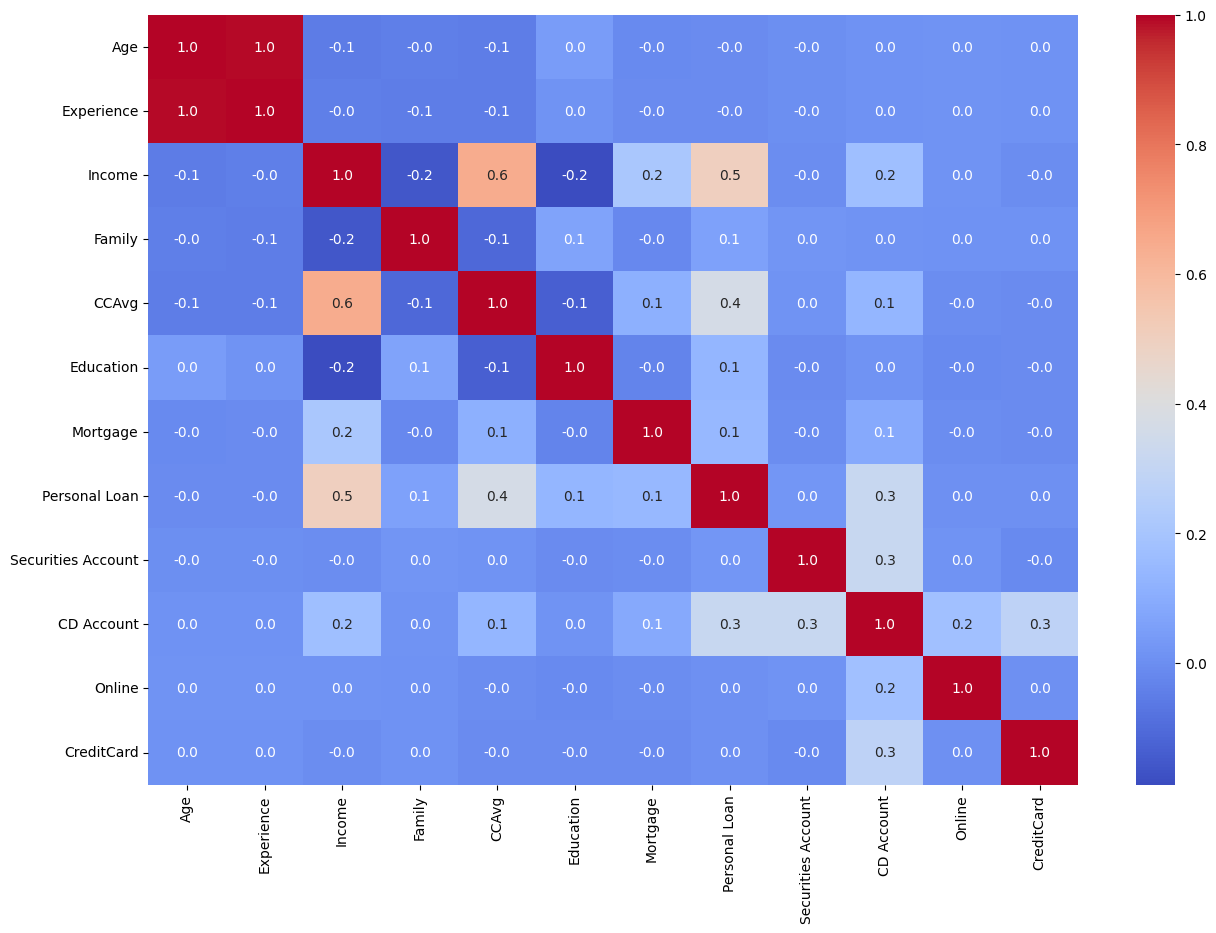

In [31]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap = 'coolwarm')
plt.show()


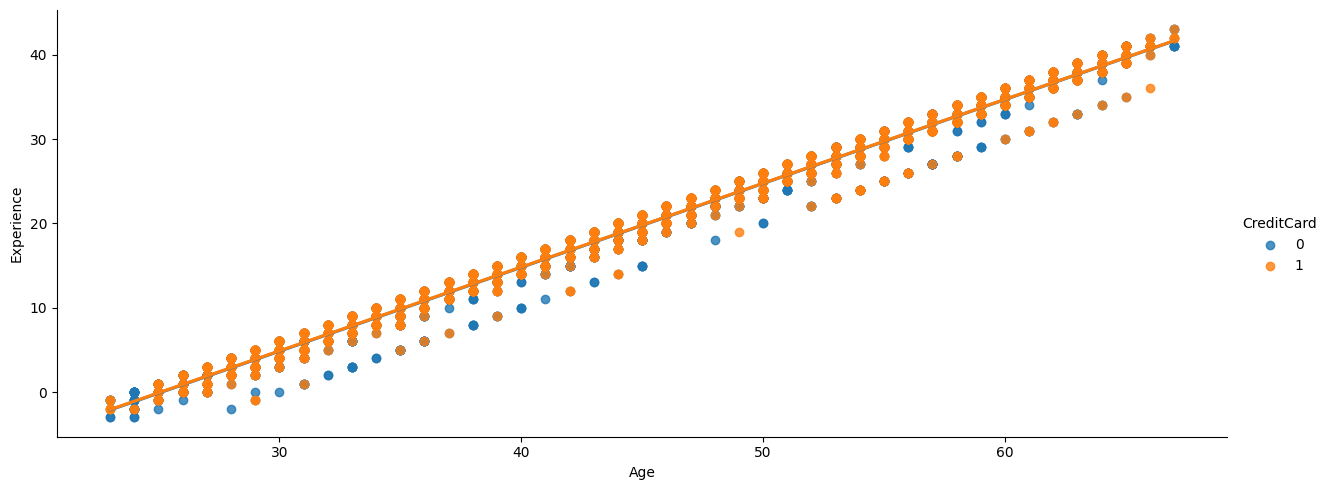

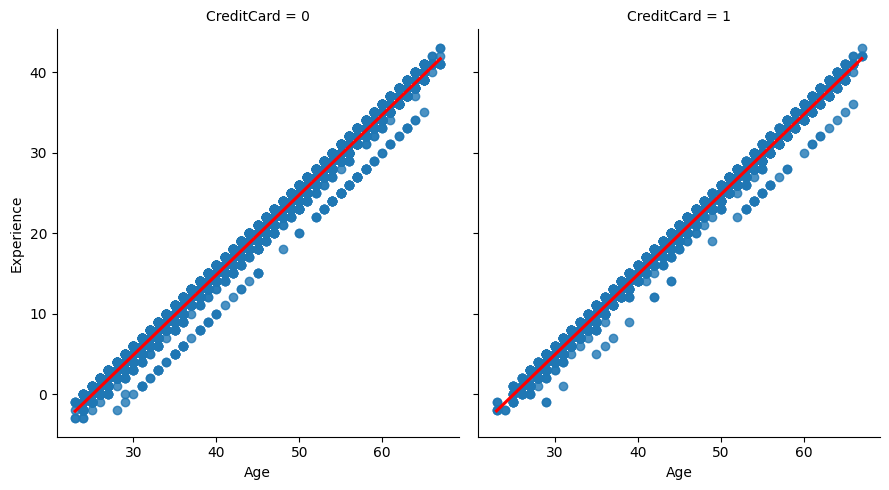

In [33]:
sns.lmplot(data=df, x='Age', y='Experience', hue = 'CreditCard', aspect=2.5)
sns.lmplot(data=df, x='Age', y='Experience', col ='CreditCard', aspect=0.9,line_kws={'color': 'red'})
plt.show()


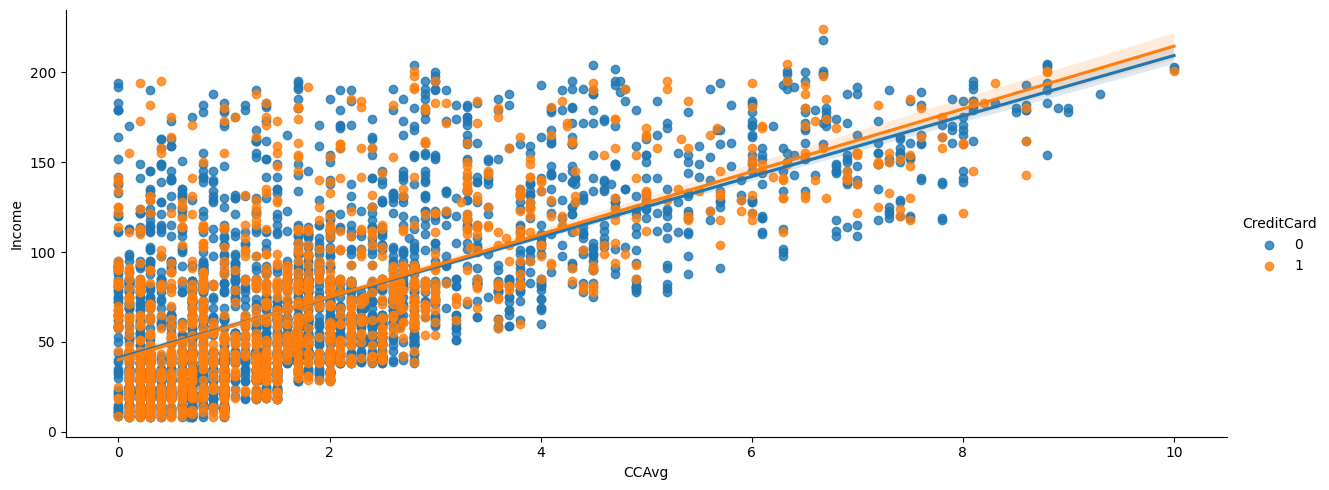

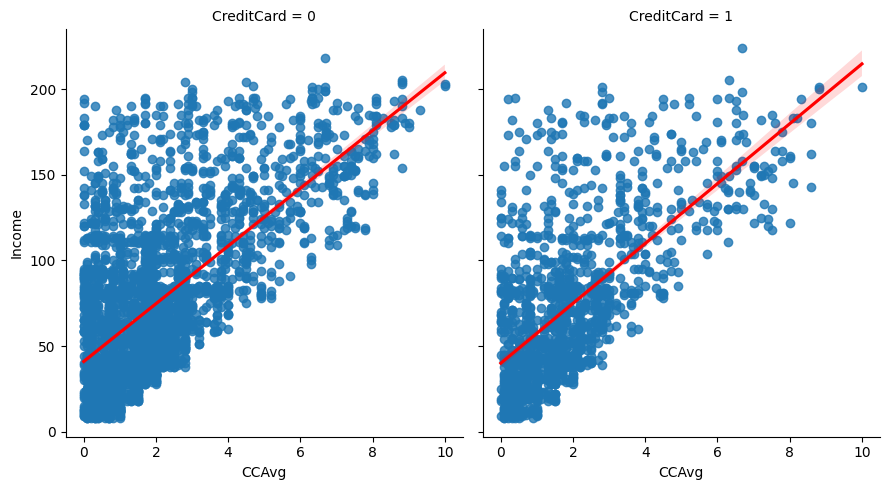

In [34]:
sns.lmplot(data=df, x='CCAvg', y='Income', hue = 'CreditCard', aspect=2.5)
sns.lmplot(data=df, x='CCAvg', y='Income', col ='CreditCard', aspect=0.9,line_kws={'color': 'red'})
plt.show()

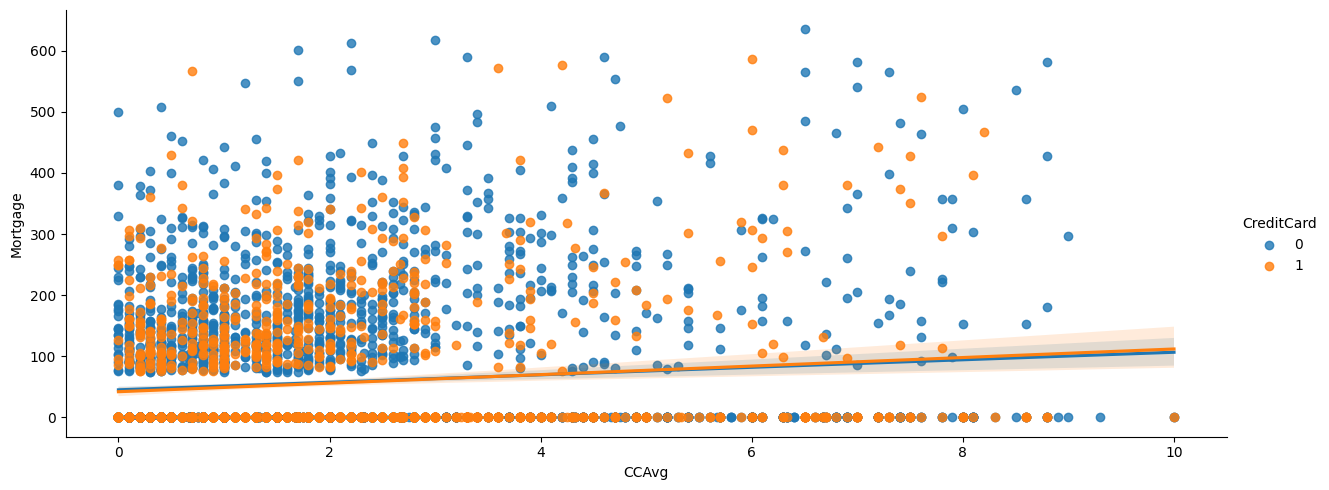

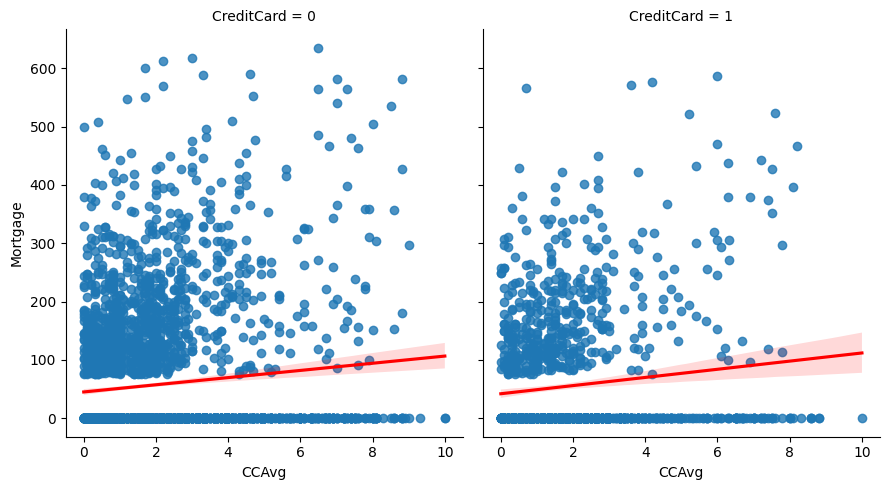

In [35]:
sns.lmplot(data=df, x='CCAvg', y='Mortgage', hue = 'CreditCard', aspect=2.5)
sns.lmplot(data=df, x='CCAvg', y='Mortgage', col ='CreditCard', aspect=0.9,line_kws={'color': 'red'})
plt.show()

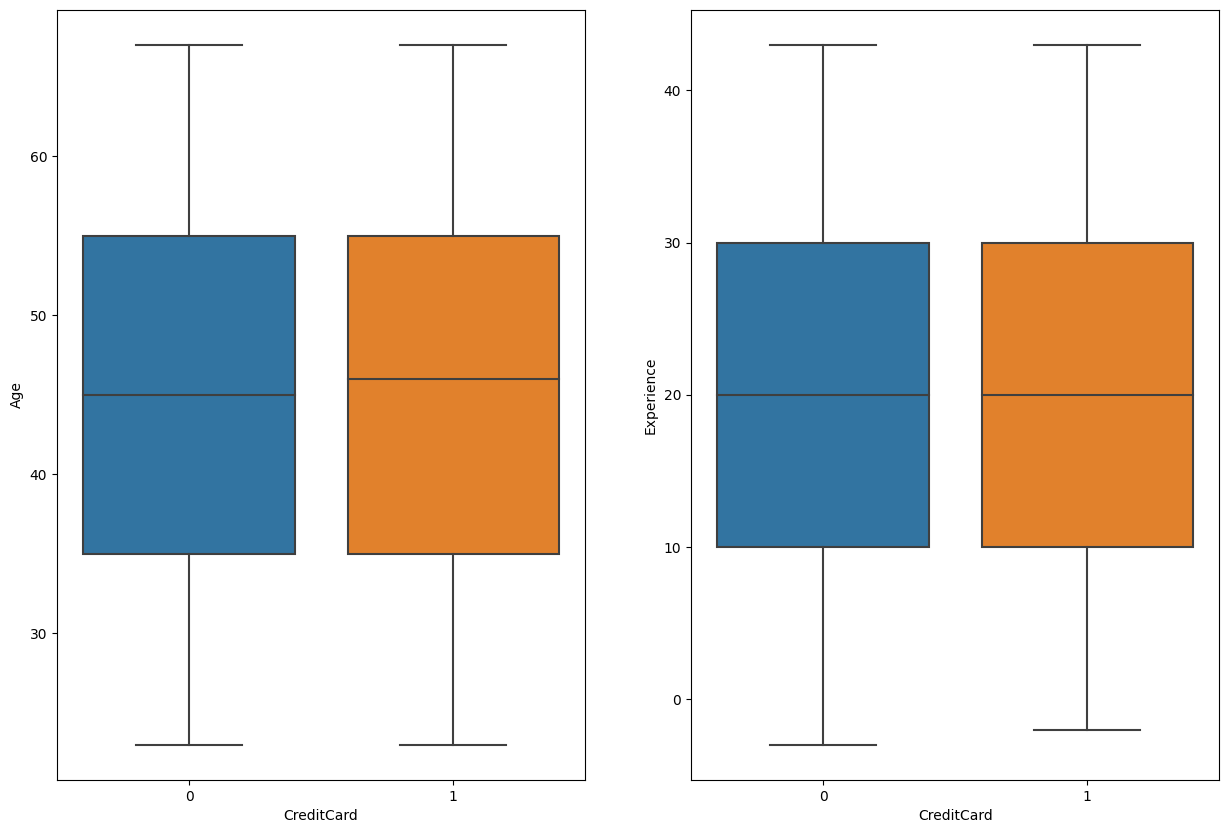

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
sns.boxplot(data = df, x ='CreditCard', y='Age',ax=ax[0])
sns.boxplot(data = df, x ='CreditCard', y='Experience',ax=ax[1])
plt.show()

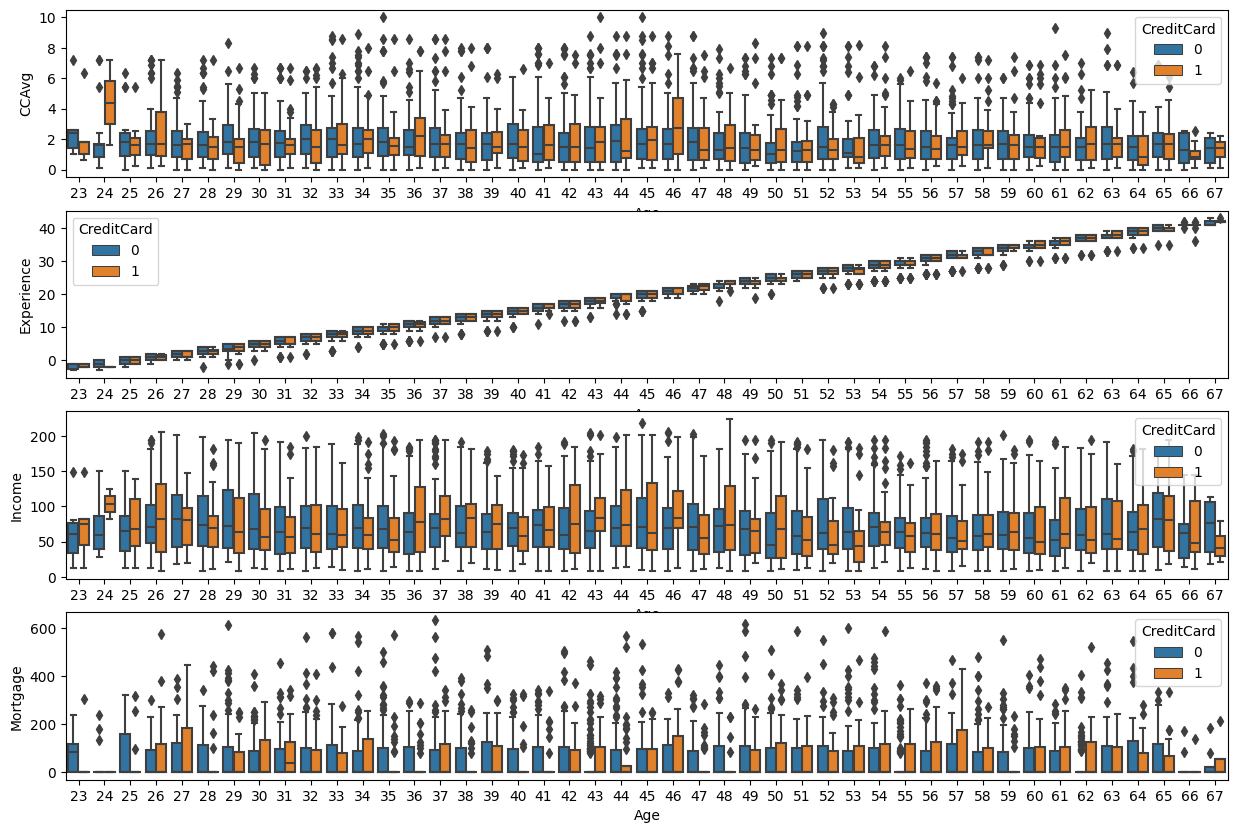

In [37]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
sns.boxplot(data = df, x ='Age', y='CCAvg', hue = 'CreditCard',ax=ax[0])
sns.boxplot(data = df, x ='Age', y='Experience', hue = 'CreditCard',ax=ax[1])
sns.boxplot(data = df, x ='Age', y='Income', hue = 'CreditCard',ax=ax[2])
sns.boxplot(data = df, x ='Age', y='Mortgage', hue = 'CreditCard',ax=ax[3])
plt.show()


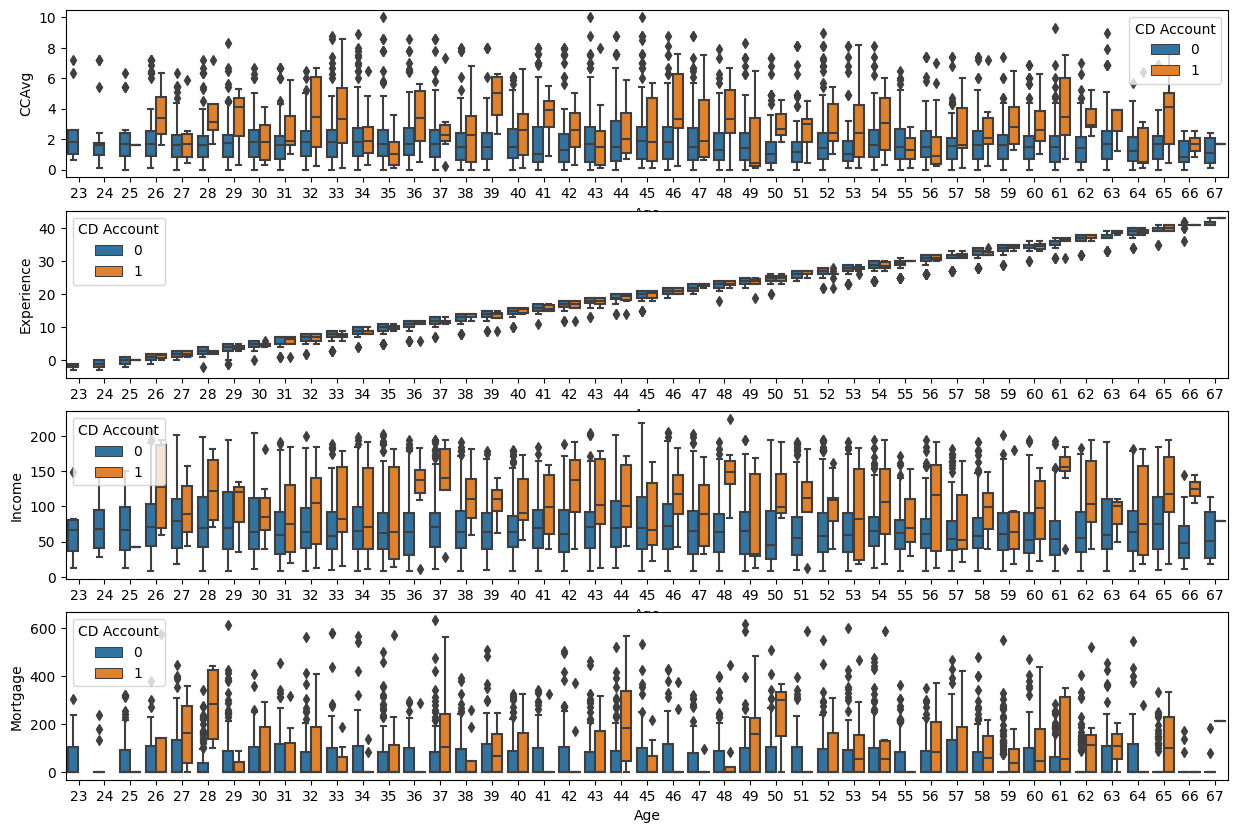

In [39]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
sns.boxplot(data = df, x ='Age', y='CCAvg', hue = 'CD Account',ax=ax[0])
sns.boxplot(data = df, x ='Age', y='Experience', hue = 'CD Account',ax=ax[1])
sns.boxplot(data = df, x ='Age', y='Income', hue = 'CD Account',ax=ax[2])
sns.boxplot(data = df, x ='Age', y='Mortgage', hue = 'CD Account',ax=ax[3])
plt.show()


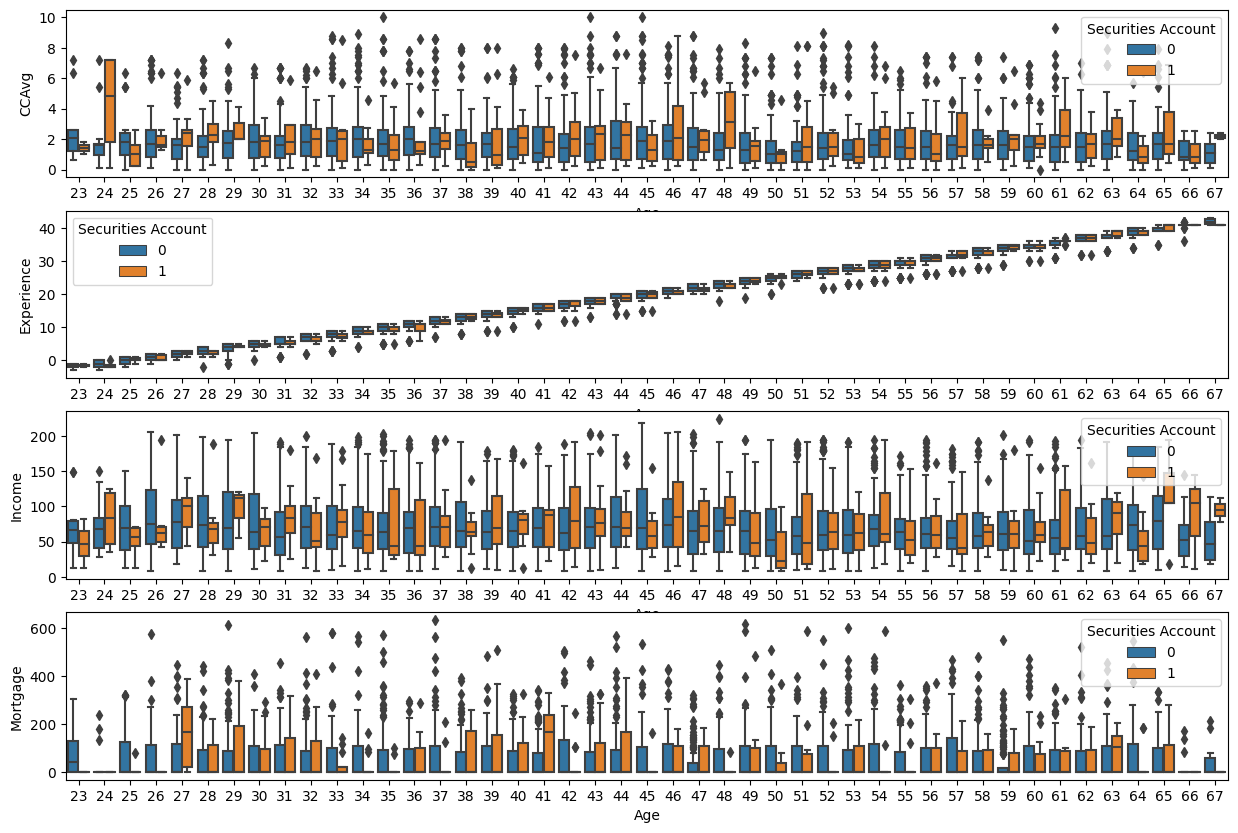

In [41]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))

sns.boxplot(data=df, x='Age', y='CCAvg', hue='Securities Account', ax=ax[0])
sns.boxplot(data=df, x='Age', y='Experience', hue='Securities Account', ax=ax[1])
sns.boxplot(data=df, x='Age', y='Income', hue='Securities Account', ax=ax[2])
sns.boxplot(data=df, x='Age', y='Mortgage', hue='Securities Account', ax=ax[3])

plt.show()

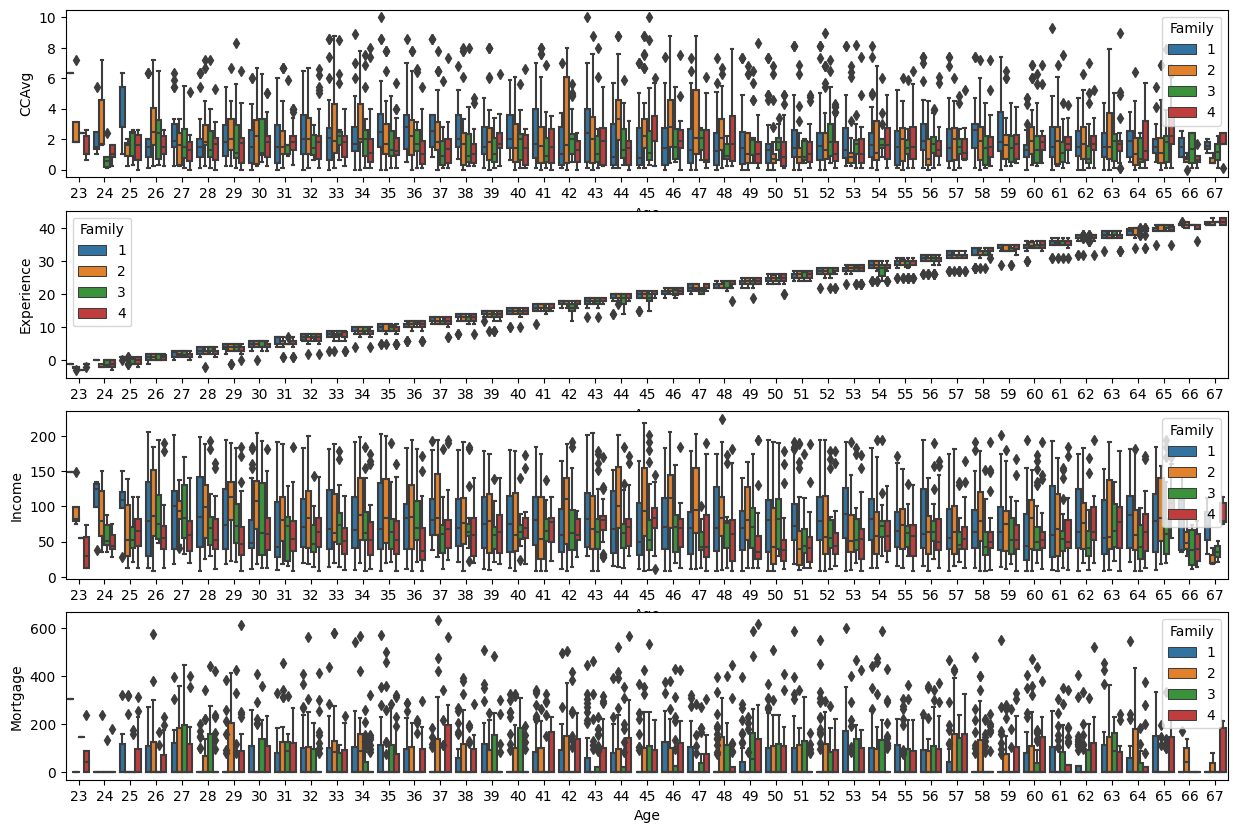

In [42]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
sns.boxplot(data = df, x ='Age', y='CCAvg', hue = 'Family',ax=ax[0])
sns.boxplot(data = df, x ='Age', y='Experience', hue = 'Family',ax=ax[1])
sns.boxplot(data = df, x ='Age', y='Income', hue = 'Family',ax=ax[2])
sns.boxplot(data = df, x ='Age', y='Mortgage', hue = 'Family',ax=ax[3])
plt.show()

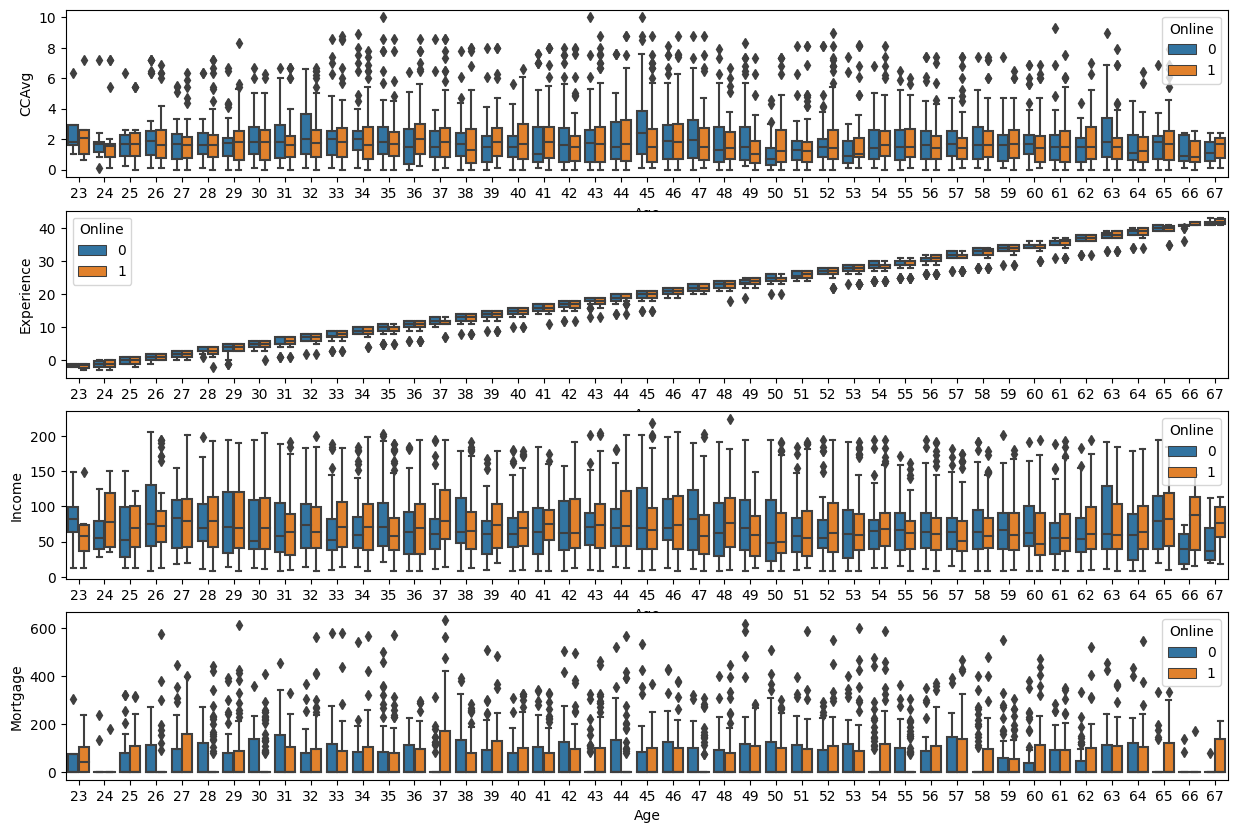

In [43]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
sns.boxplot(data = df, x ='Age', y='CCAvg', hue = 'Online',ax=ax[0])
sns.boxplot(data = df, x ='Age', y='Experience', hue = 'Online',ax=ax[1])
sns.boxplot(data = df, x ='Age', y='Income', hue = 'Online',ax=ax[2])
sns.boxplot(data = df, x ='Age', y='Mortgage', hue = 'Online',ax=ax[3])
plt.show()

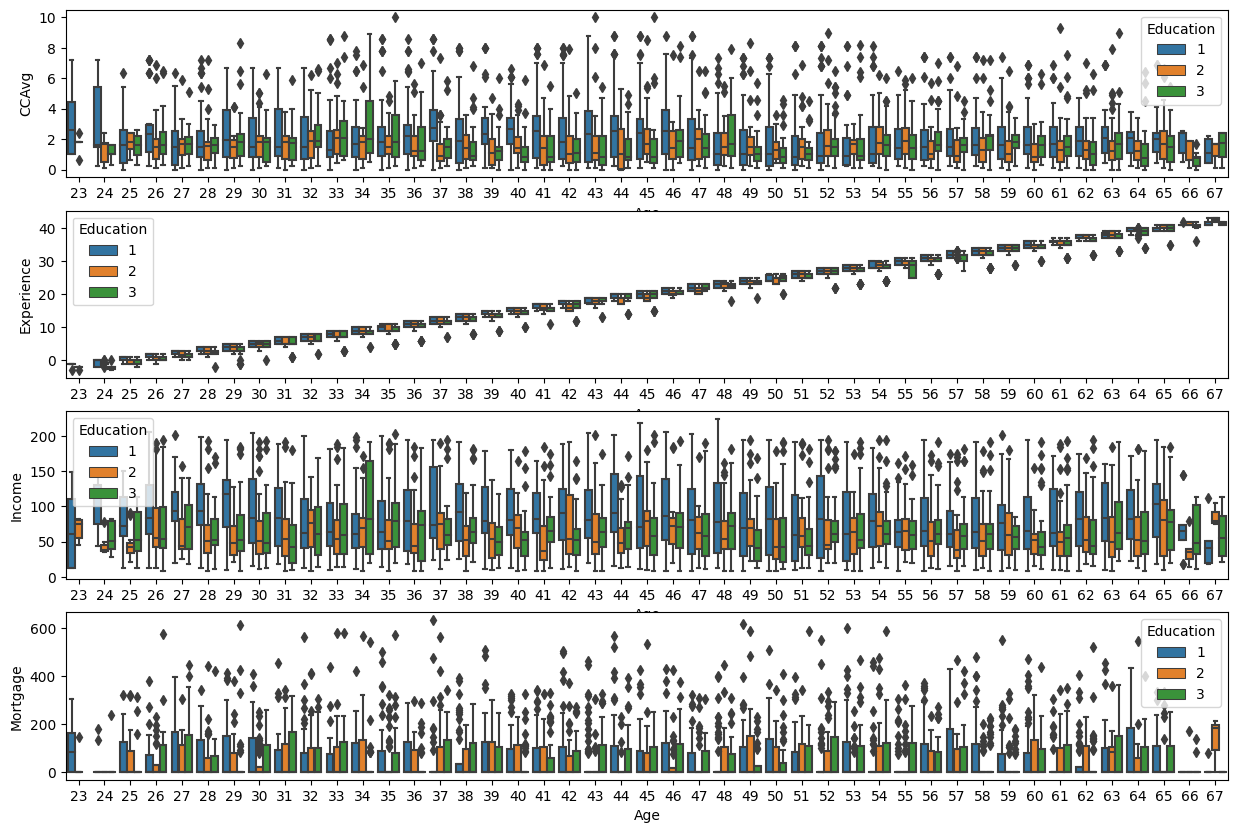

In [44]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
sns.boxplot(data = df, x ='Age', y='CCAvg', hue = 'Education',ax=ax[0])
sns.boxplot(data = df, x ='Age', y='Experience', hue = 'Education',ax=ax[1])
sns.boxplot(data = df, x ='Age', y='Income', hue = 'Education',ax=ax[2])
sns.boxplot(data = df, x ='Age', y='Mortgage', hue = 'Education',ax=ax[3])
plt.show()

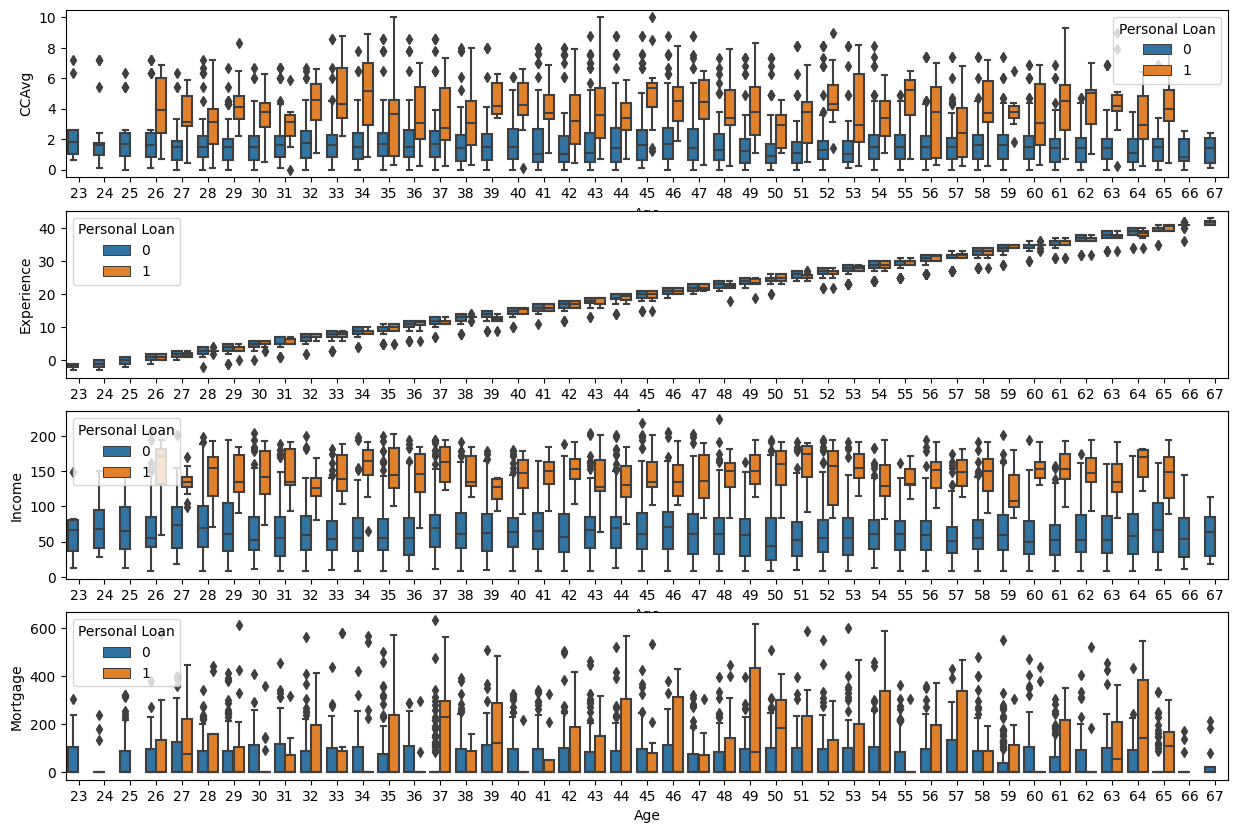

In [46]:
fig, ax = plt.subplots(4, 1, figsize=(15, 10))
sns.boxplot(data = df, x ='Age', y='CCAvg', hue = 'Personal Loan',ax=ax[0])
sns.boxplot(data = df, x ='Age', y='Experience', hue = 'Personal Loan',ax=ax[1])
sns.boxplot(data = df, x ='Age', y='Income', hue = 'Personal Loan',ax=ax[2])
sns.boxplot(data = df, x ='Age', y='Mortgage', hue = 'Personal Loan',ax=ax[3])
plt.show()


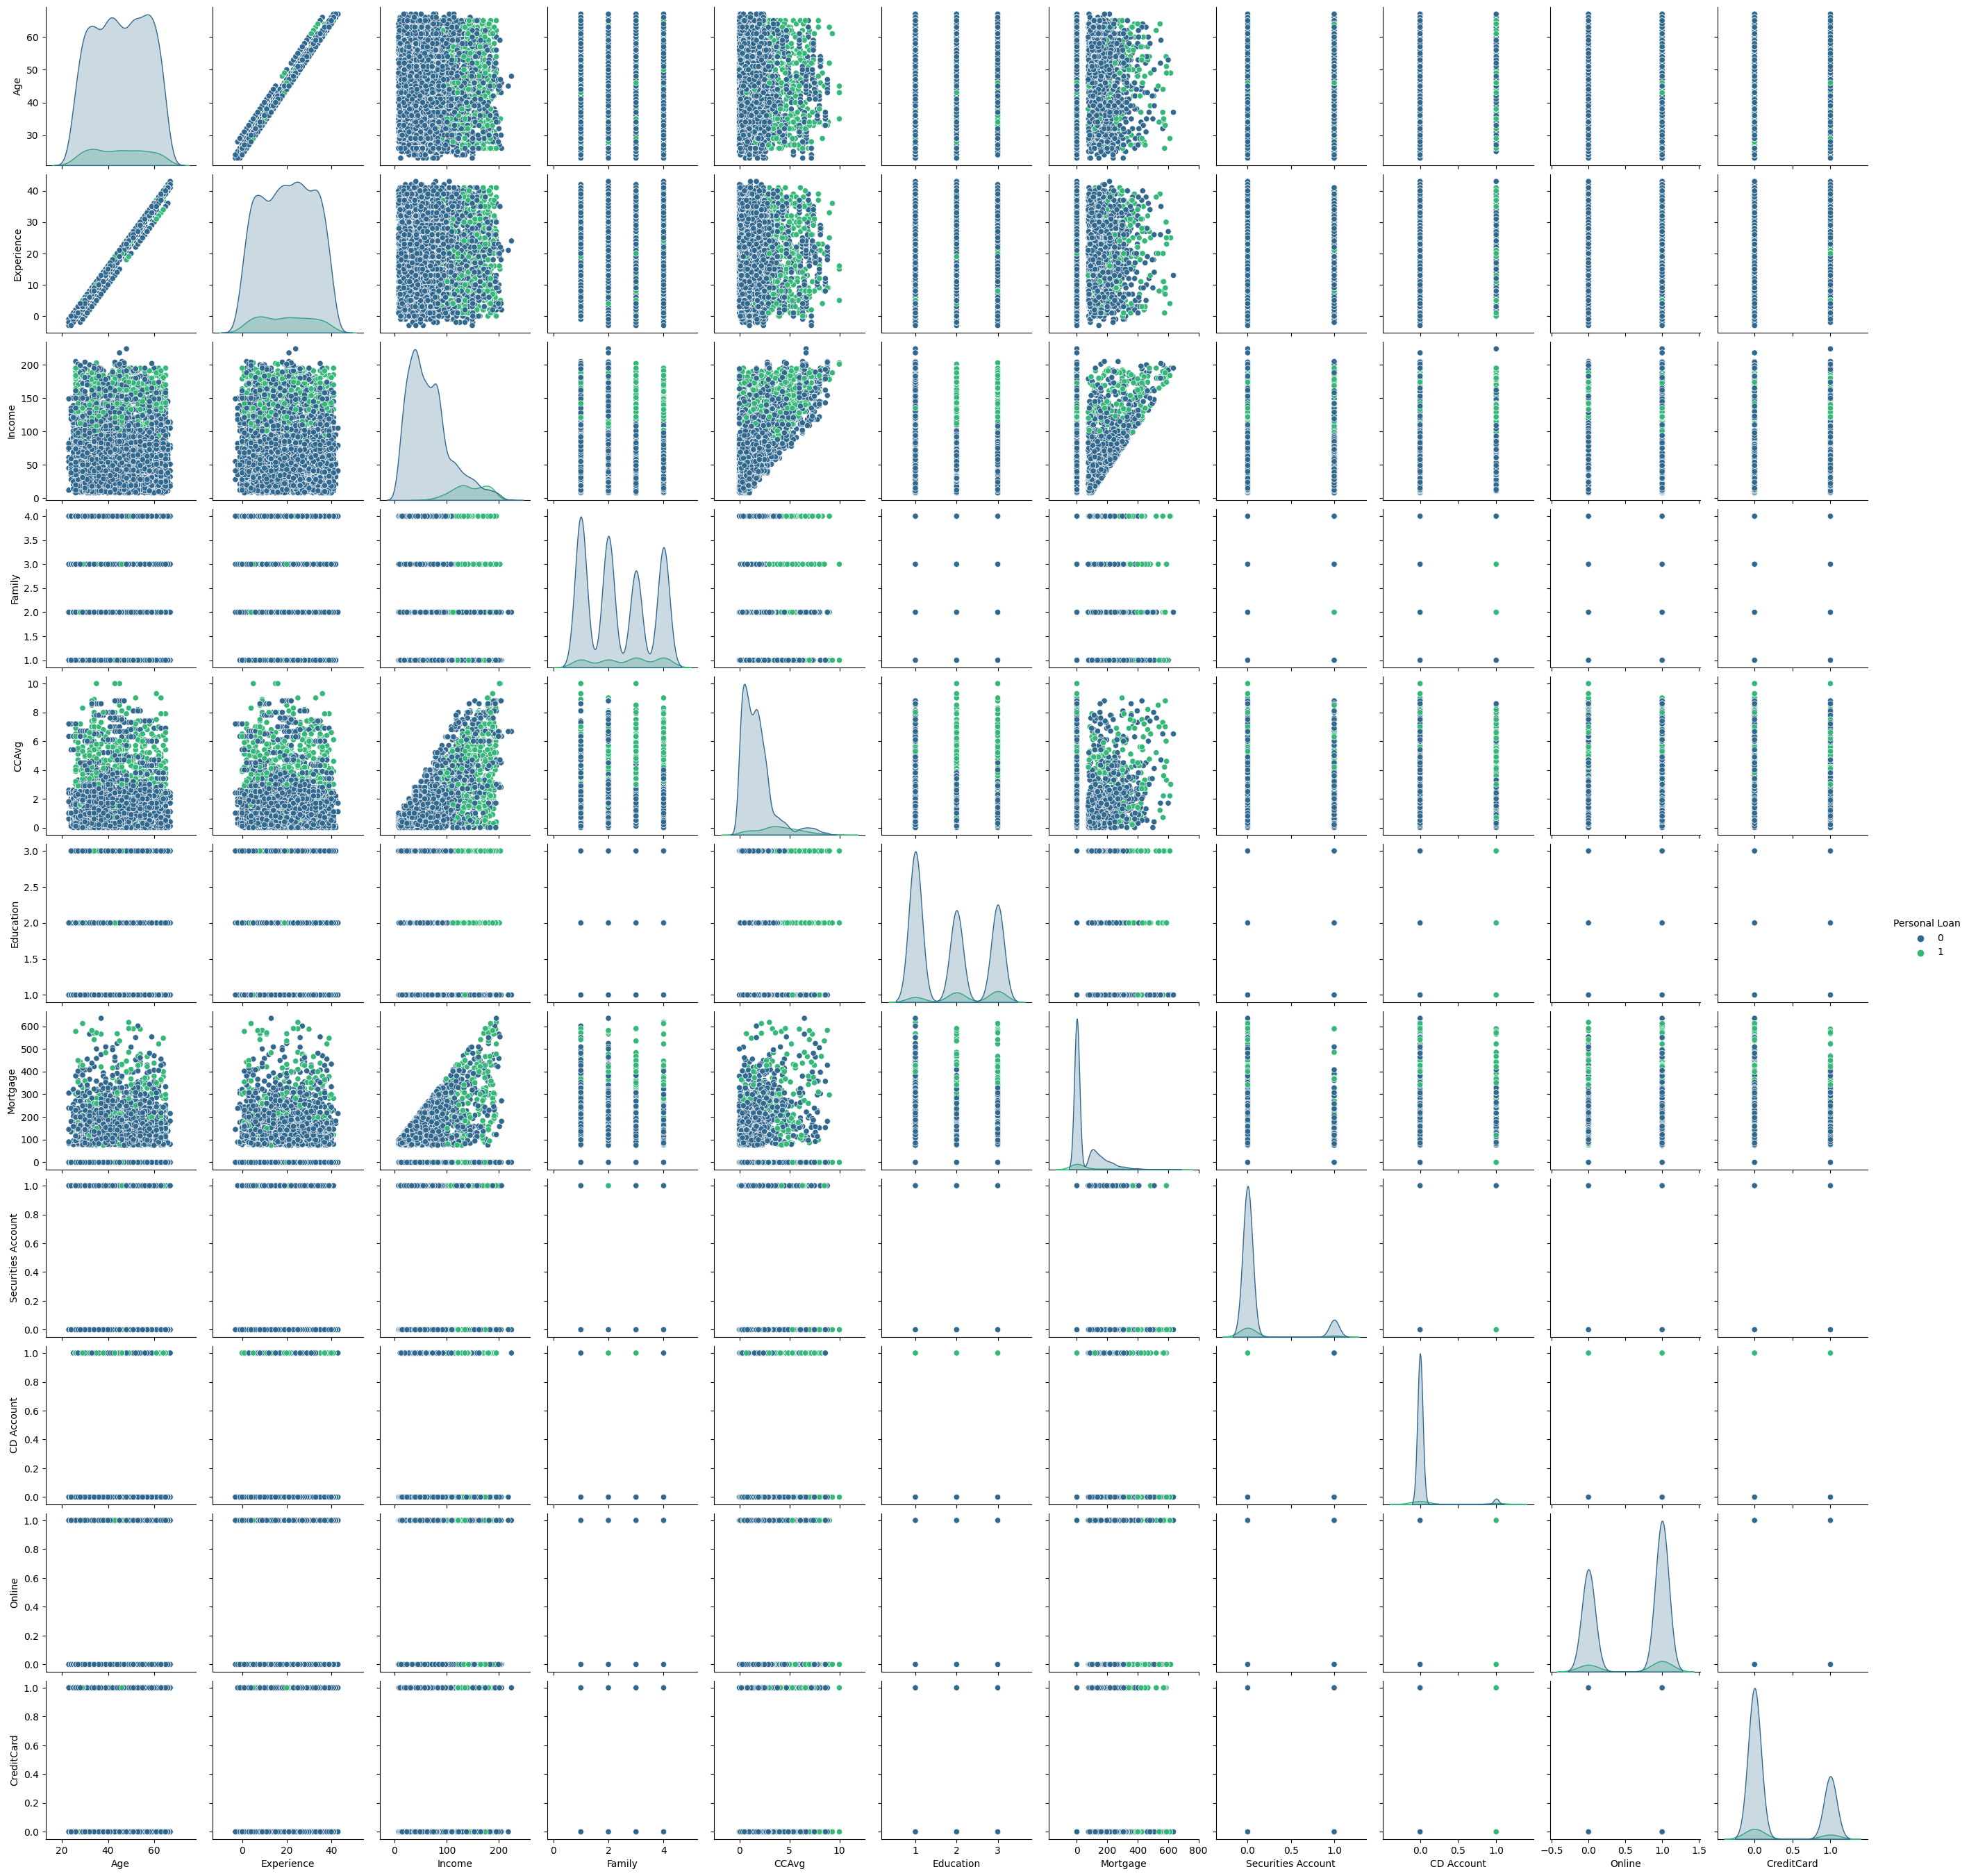

In [48]:
sns.pairplot(df, hue='Personal Loan', palette = 'viridis')
plt.show()

In [50]:
X = df.drop(columns=['Personal Loan'], axis = 1)
y = df['Personal Loan']
f_scores, p_values = f_regression(X, y)
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores,
'P_Value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='F_Score', ascending=False)
feature_scores_df


Feature      F_Score        P_Value
2               Income  1688.004580  3.560291e-318
4                CCAvg   777.413007  3.830266e-159
8           CD Account   555.829340  1.278403e-116
6             Mortgage   102.994466   5.730342e-24
5            Education    95.206194   2.709663e-22
3               Family    18.893189   1.409904e-05
7   Securities Account     2.410062   1.206209e-01
0                  Age     0.298324   5.849593e-01
1           Experience     0.274675   6.002359e-01
9               Online     0.196984   6.571858e-01
10          CreditCard     0.039227   8.430079e-01

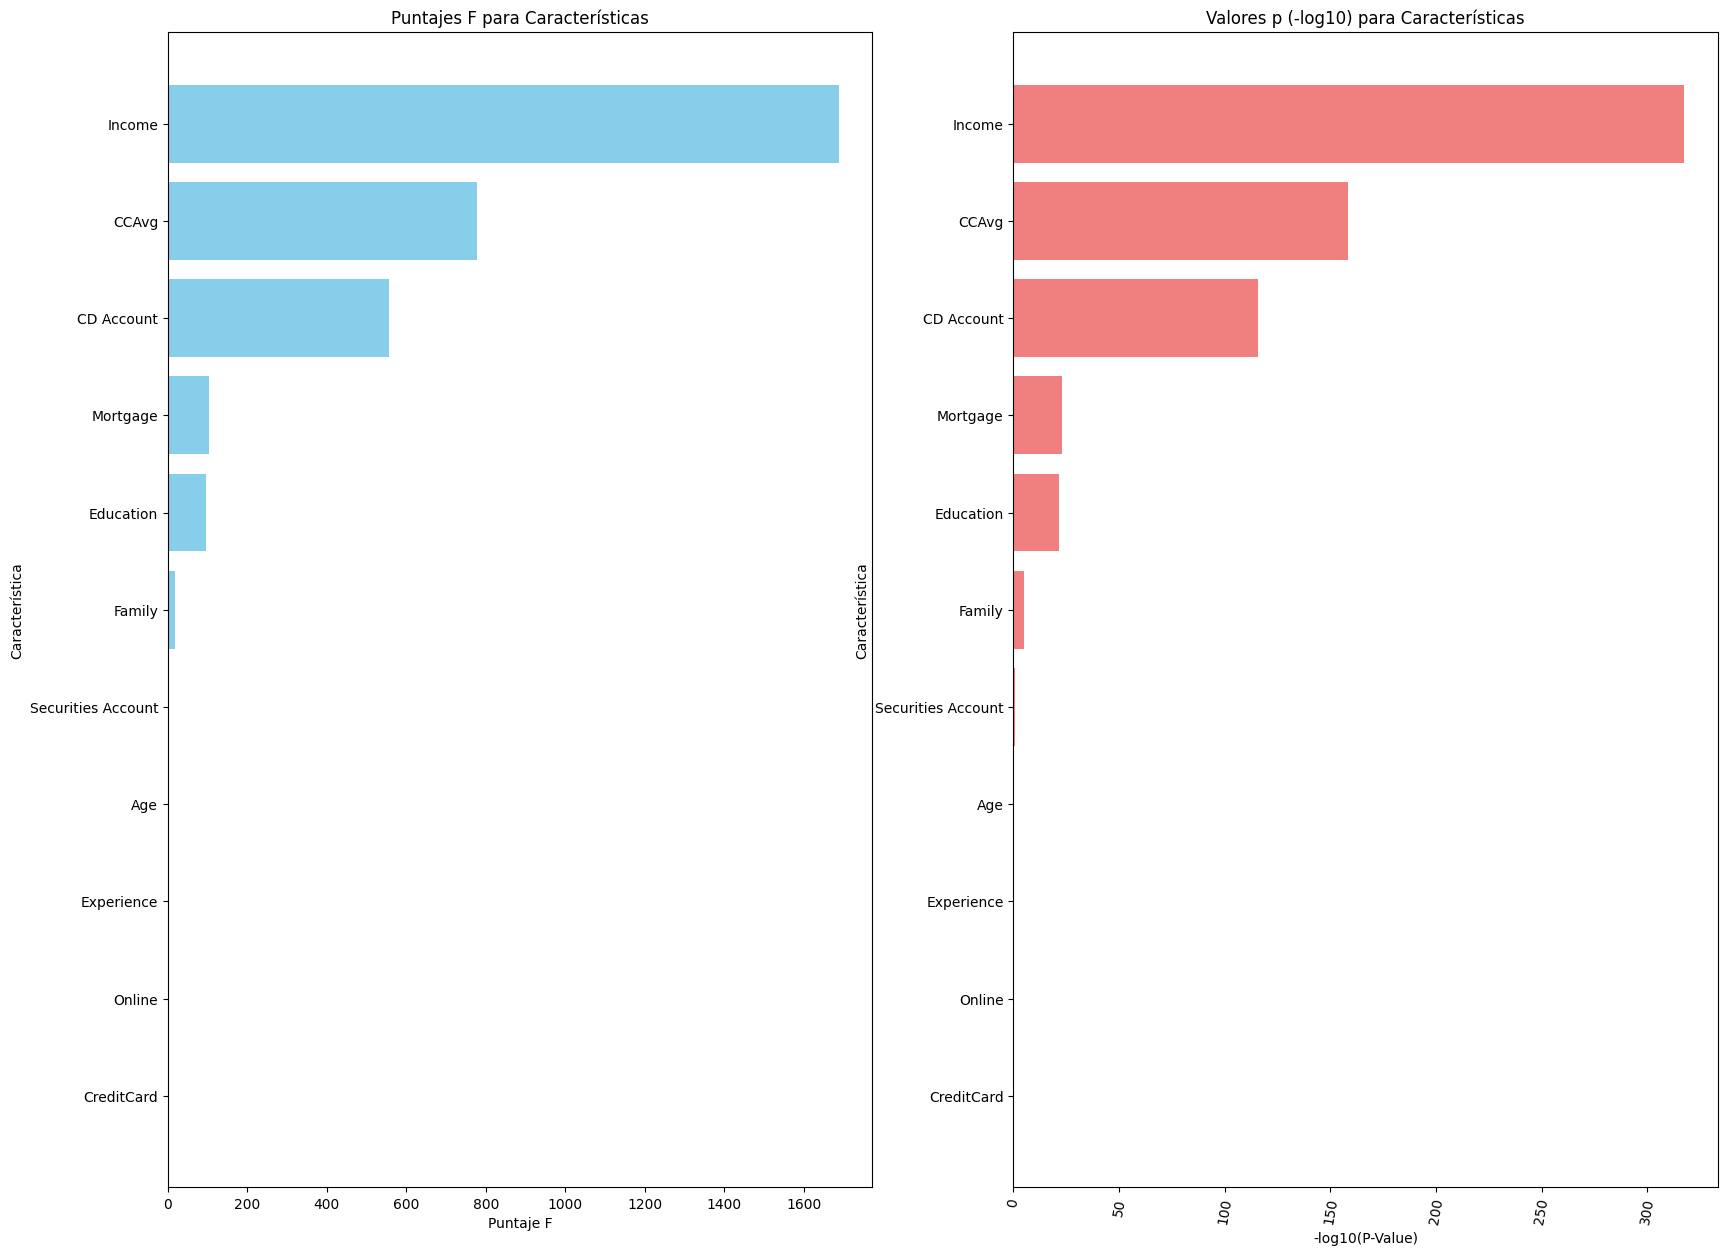

In [53]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(20, 15))

ax[0].barh(feature_scores_df['Feature'], feature_scores_df['F_Score'], color='skyblue')
ax[0].set_xlabel('Puntaje F')
ax[0].set_ylabel('Característica')
ax[0].set_title('Puntajes F para Características')

ax[1].barh(feature_scores_df['Feature'], -np.log10(feature_scores_df['P_Value']), color='lightcoral')  # Fixed the syntax error here
ax[1].set_xlabel('-log10(P-Value)')
ax[1].set_ylabel('Característica')
ax[1].set_title('Valores p (-log10) para Características')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.xticks(rotation=80)  # Fixed the syntax error here
plt.show()


In [54]:
cols = feature_scores_df[feature_scores_df['F_Score']>=1].Feature.to_list()

In [55]:
X_M = df[cols]
Y_M = df['Personal Loan']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3,random_state=42)

In [59]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)
print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.89      0.55      0.68       157

    accuracy                           0.95      1500
   macro avg       0.92      0.77      0.82      1500
weighted avg       0.94      0.95      0.94      1500

accuracy:  0.9453333333333334
mean_absolute_error:  0.05466666666666667
mean_squared_error:  0.05466666666666667


In [60]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)
print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.98      0.90      0.94       157

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500

accuracy:  0.988
mean_absolute_error:  0.012
mean_squared_error:  0.012


In [61]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)
print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.91      0.90      0.91       157

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500

accuracy:  0.9806666666666667
mean_absolute_error:  0.019333333333333334
mean_squared_error:  0.019333333333333334


In [62]:
model_SVC = SVC(kernel = 'rbf' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)
print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.98      0.82      0.89       157

    accuracy                           0.98      1500
   macro avg       0.98      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500

accuracy:  0.9793333333333333
mean_absolute_error:  0.020666666666666667
mean_squared_error:  0.020666666666666667


In [63]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)
print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1343
           1       0.96      0.76      0.85       157

    accuracy                           0.97      1500
   macro avg       0.97      0.88      0.92      1500
weighted avg       0.97      0.97      0.97      1500

accuracy:  0.9713333333333334
mean_absolute_error:  0.028666666666666667
mean_squared_error:  0.028666666666666667


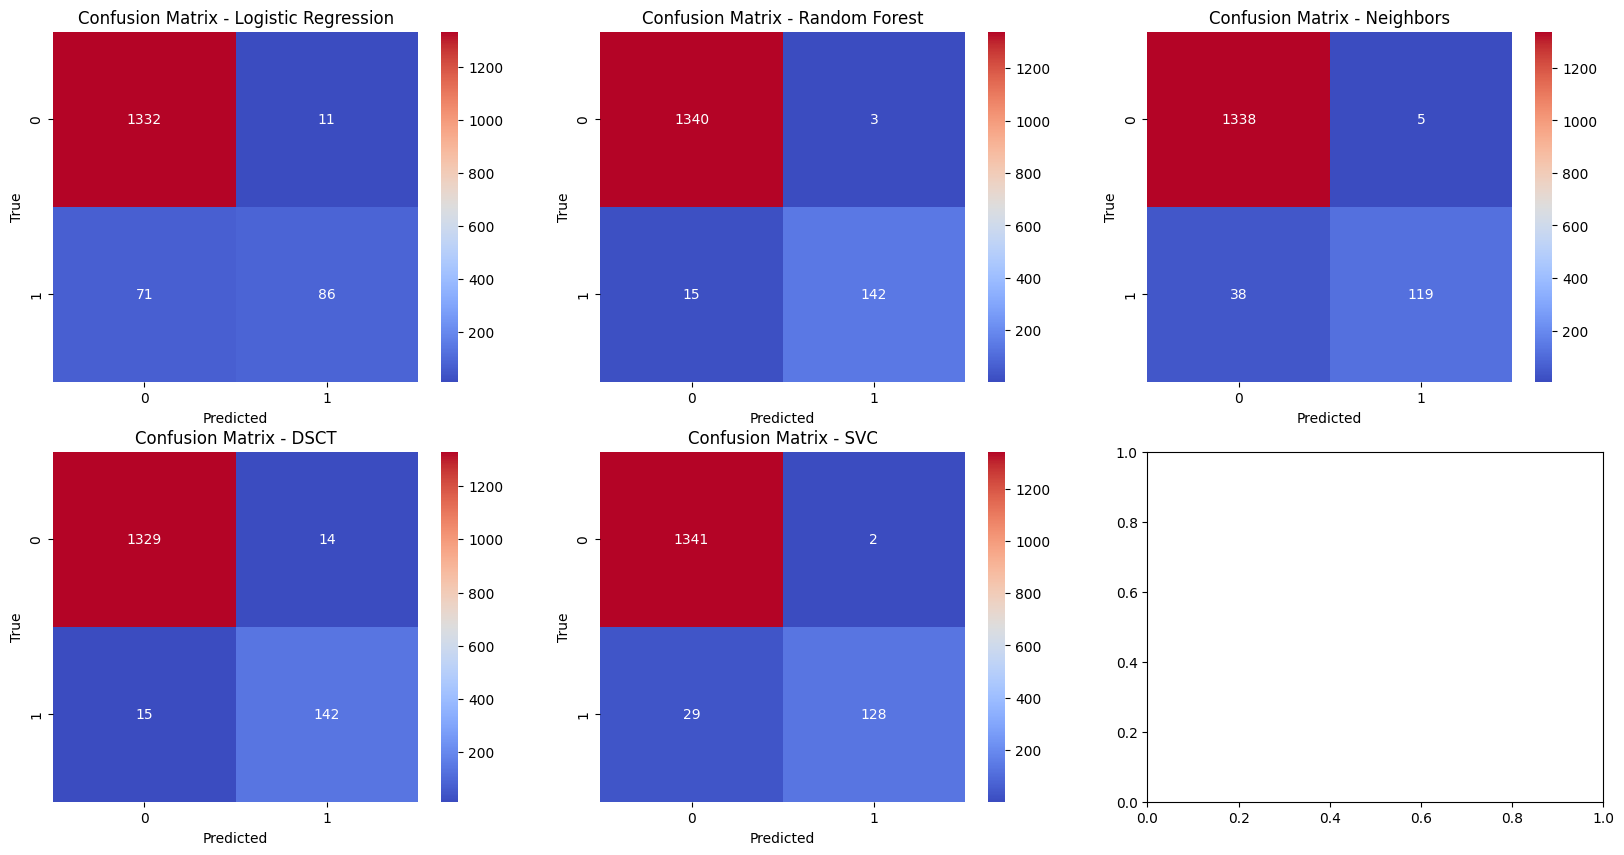

In [64]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.heatmap(RLOG, annot=True, cmap='coolwarm', fmt='g', ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix - Logistic Regression')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('True')
sns.heatmap(RMFC, annot=True, cmap='coolwarm', fmt='g', ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix - Random Forest')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('True')
sns.heatmap(DSCT, annot=True, cmap='coolwarm', fmt='g', ax=axes[1,0])
axes[1,0].set_title('Confusion Matrix - DSCT')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('True')
sns.heatmap(SVC_, annot=True, cmap='coolwarm', fmt='g', ax=axes[1,1])
axes[1,1].set_title('Confusion Matrix - SVC')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('True')
sns.heatmap(NEG, annot=True, cmap='coolwarm', fmt='g', ax=axes[0,2])
axes[0,2].set_title('Confusion Matrix - Neighbors')
axes[0,2].set_xlabel('Predicted')
axes[0,2].set_ylabel('True')
plt.show()

<Axes: xlabel='Personal Loan', ylabel='Density'>

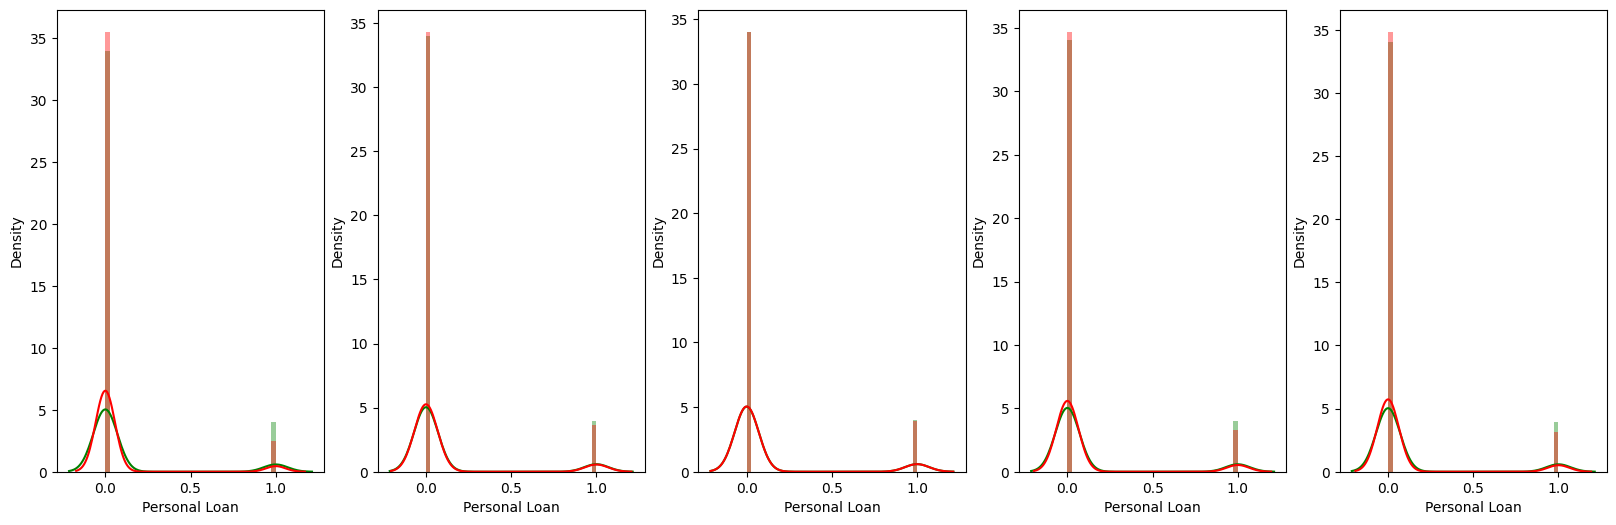

In [65]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))
sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0], color = 'red')
sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')
sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')
sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')
sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')